### Visaulise the data sets for validation

In [33]:
from mmap import mmap, ACCESS_READ
from struct import unpack
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [34]:
# basline, flight 2x exps

base = "../../data/clean/"
sensor = "taltech"

data = {}

## read all files
env_dirs = [entry.name for entry in os.scandir(base) if entry.is_dir()]
print(env_dirs)

for env in env_dirs:
    # gets exp1 and exp2
    exp_dirs = [entry.name for entry in os.scandir(f"{base}/{env}") if entry.is_dir()]
    print(exp_dirs)
    # add an entry for the environment (baseline, flight)
    data[env] = {}
    for e in exp_dirs:
        data[env][e] = {} # add an entry the experimenter
        #path for an experimenter 
        exp_path = f"{base}/{env}/{e}/{sensor}"
        # get the shoes / barefoot dirs
        fw_dirs = [entry.name for entry in os.scandir(exp_path) if entry.is_dir()]
        print(fw_dirs)
        for f in fw_dirs:
            data[env][e][f] = {} # add an entry for the footwear
            fw_path = f"{exp_path}/{f}/*.csv"

            for file_path in glob.glob(fw_path):
                f_name = file_path.split("\\")[1].split(".")[0]
                data[env][e][f][f_name] = pd.read_csv(file_path)

['baseline', 'flight']
['exp1', 'exp2']
['barefoot', 'shoes']
['barefoot', 'shoes']
['exp1', 'exp2']
['barefoot', 'shoes']
['barefoot', 'shoes']


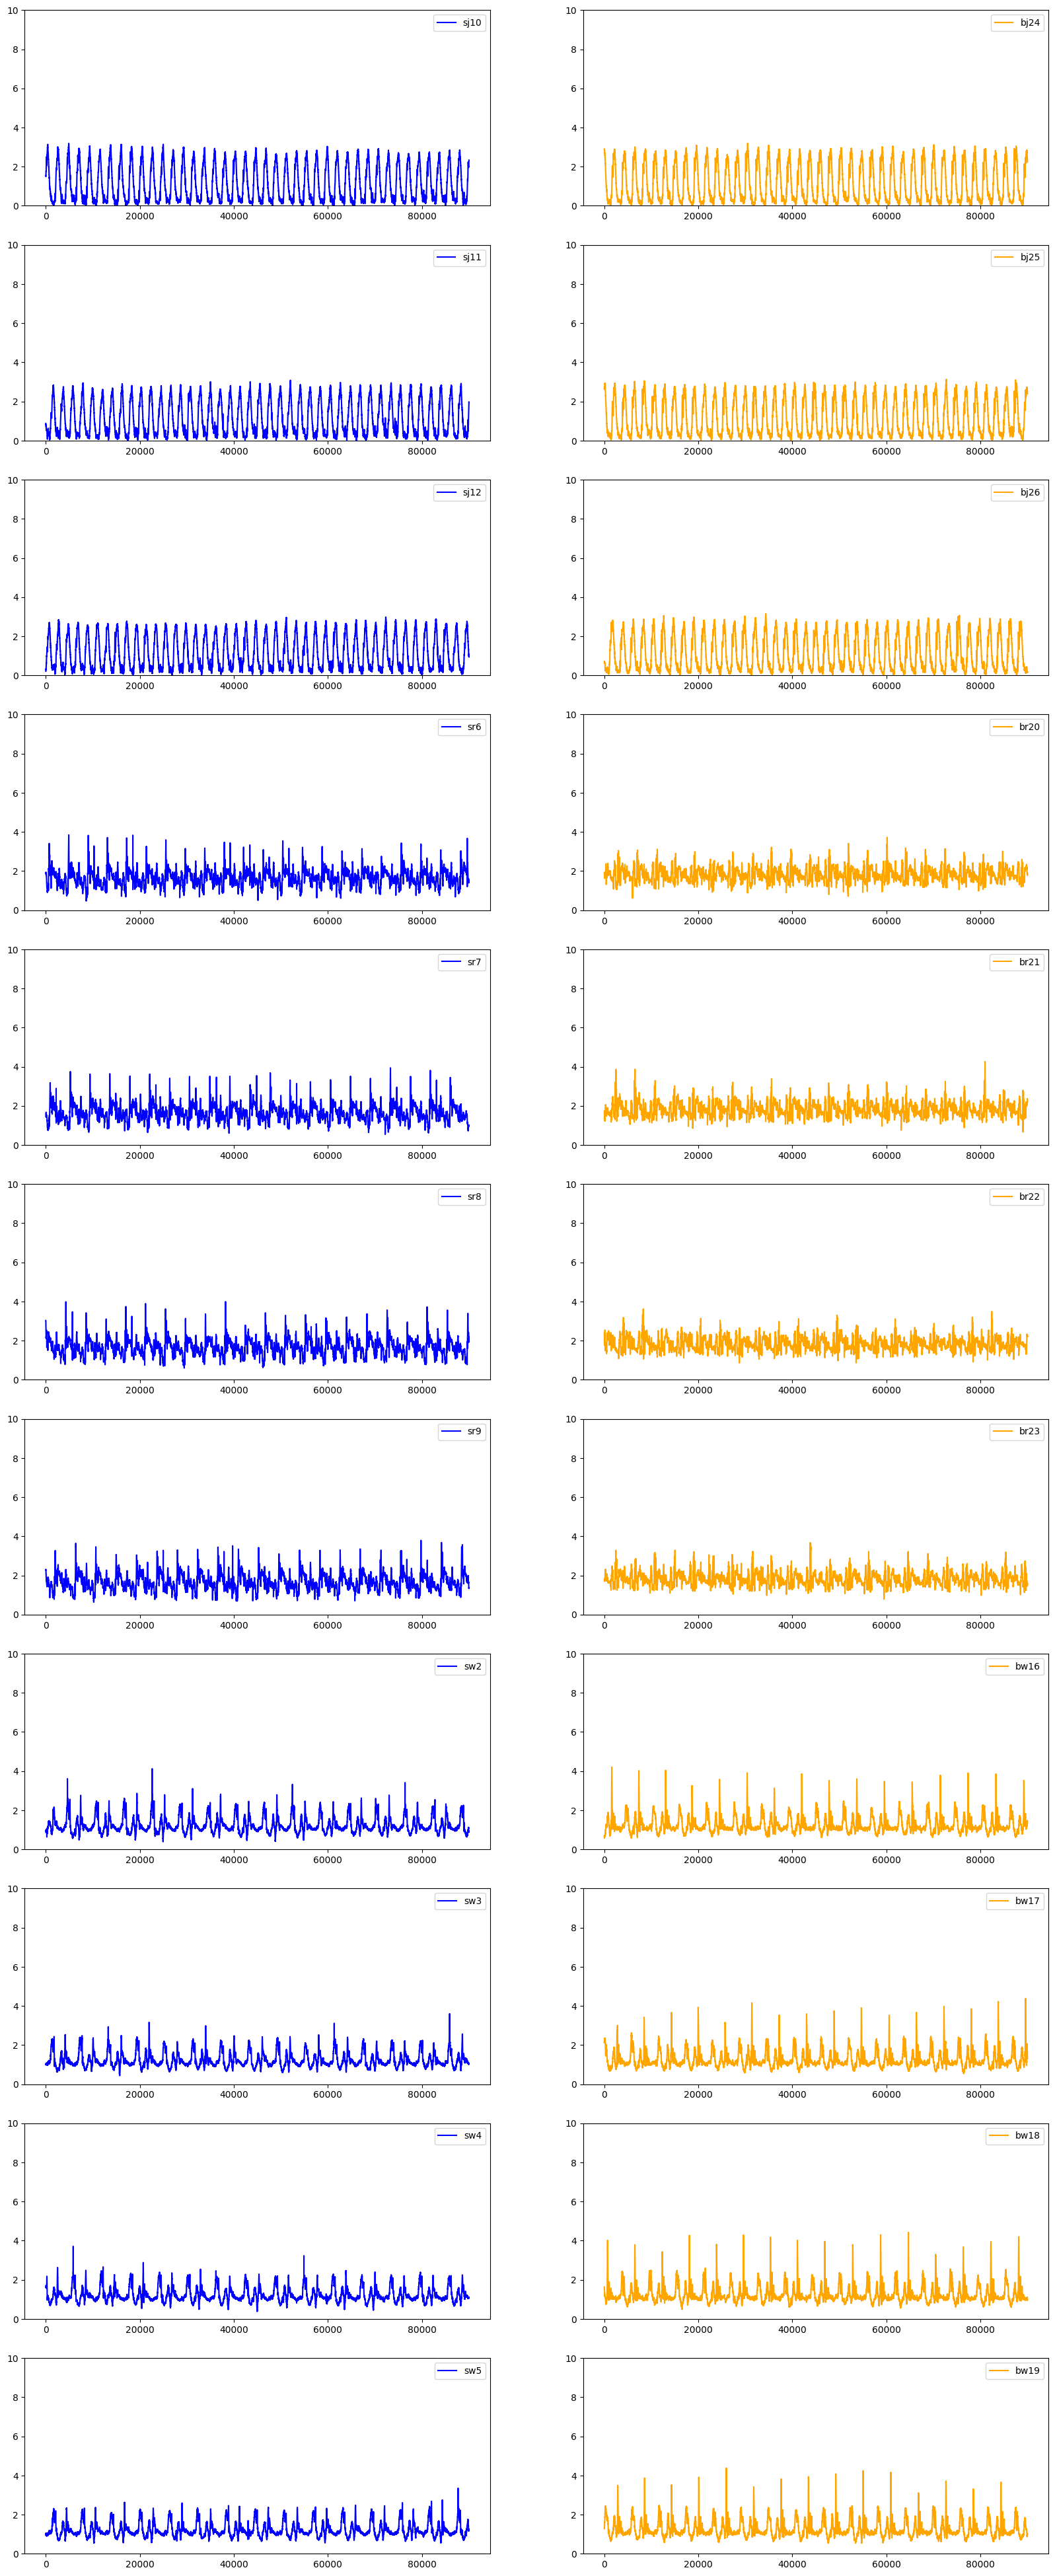

In [43]:
# plot the baseline data for an experimenter

exp = 2
env = "baseline"
direction = "mag" 

fig, ax = plt.subplots(11,2, figsize=(20, 50))

for idx, d in enumerate(data[env][f"exp{str(exp)}"]["shoes"]):
    ax[idx][0].plot(data[env][f"exp{str(exp)}"]["shoes"][d][direction], label=d, color="blue")
    ax[idx][0].legend()
    ax[idx][0].set_ylim(0,10)

for idx, d in enumerate(data[env][f"exp{str(exp)}"]["barefoot"]):
    ax[idx][1].plot(data[env][f"exp{str(exp)}"]["barefoot"][d][direction], label=d, color="orange")
    ax[idx][1].legend()
    ax[idx][1].set_ylim(0,10)